In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def return_all_rows(x):
    pd.set_option('display.max_rows', len(x))
    return x
    pd.reset_option('display.max_rows')
    
def return_all_columns(x):
    pd.set_option('display.max_columns', len(x))
    return x
    pd.reset_option('display.max_columns')

In [3]:
# Load training data
df = pd.read_csv('C:/Users/shane/Desktop/W205_Final/W205_Project/historic_load_clean_enrich/df.csv')

In [4]:
# Clean - Train - Convert Labels
UpDown = preprocessing.LabelEncoder()
labels = UpDown.fit_transform(df.forward_twelve_month_return_up)

df['labels'] = labels

In [15]:
# Review - df - Features

return_all_columns(df)

,Unnamed: 0,GVKEY,GVKEY-year-month,sector,year-month,forward_one_month_return,forward_two_month_return,forward_three_month_return,forward_four_month_return,forward_five_month_return,forward_six_month_return,forward_seven_month_return,forward_eight_month_return,forward_nine_month_return,forward_ten_month_return,forward_eleven_month_return,forward_twelve_month_return,forward_thirteen_month_return,forward_fourteen_month_return,forward_fifteen_month_return,forward_sixteen_month_return,forward_seventeen_month_return,forward_eighteen_month_return,forward_nineteen_month_return,forward_twenty_month_return,forward_twentyone_month_return,forward_twentytwo_month_return,forward_twentythree_month_return,forward_twentyfour_month_return,forward_twentyfive_month_return,forward_twentysix_month_return,forward_twentyseven_month_return,forward_twentyeight_month_return,forward_twentynine_month_return,forward_thirty_month_return,forward_thirtyone_month_return,forward_thirtytwo_month_return,forward_thirtythree_month_return,forward_thirtyfour_month_return,forward_thirtyfive_month_return,forward_thirtysix_month_return,past_one_month_return,past_two_month_return,past_three_month_return,past_four_month_return,past_five_month_return,past_six_month_return,past_seven_month_return,past_eight_month_return,past_nine_month_return,past_ten_month_return,past_eleven_month_return,past_twelve_month_return,past_thirteen_month_return,past_fourteen_month_return,past_fifteen_month_return,past_sixteen_month_return,past_seventeen_month_return,past_eighteen_month_return,past_nineteen_month_return,past_twenty_month_return,past_twentyone_month_return,past_twentytwo_month_return,past_twentythree_month_return,past_twentyfour_month_return,past_twentyfive_month_return,past_twentysix_month_return,past_twentyseven_month_return,past_twentyeight_month_return,past_twentynine_month_return,past_thirty_month_return,past_thirtyone_month_return,past_thirtytwo_month_return,past_thirtythree_month_return,past_thirtyfour_month_return,past_thirtyfive_month_return,past_thirtysix_month_return,accrual,adv_sale,aftret_eq,aftret_equity,aftret_invcapx,at_turn,bm,CAPEI,capital_ratio,cash_conversion,cash_debt,cash_lt,cash_ratio,cfm,curr_debt,curr_ratio,de_ratio,debt_assets,debt_at,debt_capital,debt_ebitda,debt_invcap,DIVYIELD,dltt_be,dpr,efftax,equity_invcap,evm,fcf_ocf,gpm,GProf,int_debt,int_totdebt,intcov,intcov_ratio,inv_turn,invt_act,lt_debt,lt_ppent,npm,ocf_lct,opmad,opmbd,pay_turn,pcf,pe_exi,pe_inc,pe_op_basic,pe_op_dil,PEG_1yrforward,PEG_ltgforward,PEG_trailing,pretret_earnat,pretret_noa,profit_lct,ps,ptb,ptpm,quick_ratio,rd_sale,rect_act,rect_turn,roa,roce,roe,sale_equity,sale_invcap,sale_nwc,short_debt,staff_sale,totdebt_invcap,dvpspm,dvpsxm,dvrate,spcsrc,alpha,b_hml,b_mkt,b_smb,b_umd,exret,ivol,n,R2,tvol,BUYPCT,HOLDPCT,SELLPCT,MEANREC,MEDREC,recup,recdown,STDEV,january,february,march,april,may,june,july,august,september,october,november,december,past_one_month_return_zscore,past_two_month_return_zscore,past_three_month_return_zscore,past_four_month_return_zscore,past_five_month_return_zscore,past_six_month_return_zscore,past_seven_month_return_zscore,past_eight_month_return_zscore,past_nine_month_return_zscore,past_ten_month_return_zscore,past_eleven_month_return_zscore,past_twelve_month_return_zscore,past_thirteen_month_return_zscore,past_fourteen_month_return_zscore,past_fifteen_month_return_zscore,past_sixteen_month_return_zscore,past_seventeen_month_return_zscore,past_eighteen_month_return_zscore,past_nineteen_month_return_zscore,past_twenty_month_return_zscore,past_twentyone_month_return_zscore,past_twentytwo_month_return_zscore,past_twentythree_month_return_zscore,past_twentyfour_month_return_zscore,past_twentyfive_month_return_zscore,past_twentysix_month_return_zscore,past_twentyseven_month_return_zscore,past_twentyeight_month_return_zscore,past_twentynine_month_return_zscore,past_thirty_month_return_zscore,past_thirtyone_month_return_zscore,past_thirtytwo_month_return_zscore,past_th

In [8]:
# df - Subset - Feature Variables Measuring Category
features = [
            'spcsrc_zscore', 'past_sixteen_month_return_up',
            'past_twentyfour_month_return_up', 'past_twenty_month_return_up',
            'tvol_zscore', 'past_thirtysix_month_return_up',
            'past_twentyeight_month_return_up', 'past_twelve_month_return_up',
            'past_thirtytwo_month_return_up', 'ivol_zscore',
            'past_eight_month_return_up', 'DIVYIELD_zscore',
            'sector_Financials', 'past_four_month_return_up', 'b_smb', 'ptb',
            'ps_zscore', 'ocf_lct_zscore', 'b_hml',
            'sector_Information Technology', 'curr_debt_zscore', 'b_mkt',
            'sector_Utilities', 'profit_lct_sector_zscore',
            'STDEV_sector_zscore', 'R2_sector_zscore', 'pe_op_basic_zscore',
            'pe_exi_zscore', 'pe_inc_zscore', 'PEG_1yrforward_zscore',
            'dvpsxm_zscore', 'b_umd', 'sector_Consumer Discretionary',
            'cash_debt_zscore', 'dvpspm_zscore', 'BUYPCT',
            'PEG_trailing_zscore', 'MEDREC', 'short_debt_sector_zscore',
            'MEANREC', 'PEG_ltgforward_zscore', 'HOLDPCT',
            'sector_Health Care', 'pcf_zscore', 'GProf_sector_zscore',
            'debt_at_sector_zscore', 'cash_lt_zscore', 'pe_op_dil_zscore',
            'rect_act_zscore', 'debt_assets_zscore', 'alpha_sector_zscore',
            'at_turn_zscore', 'accrual_zscore', 'SELLPCT', 'exret_zscore',
            'cash_conversion_zscore', 'sector_Consumer Staples',
            'gpm_sector_zscore', 'cash_ratio_sector_zscore', 'rd_sale_zscore',
            'adv_sale_sector_zscore', 'sector_Real Estate',
            'staff_sale_sector_zscore', 'sector_Telecommunication Services',
            'pretret_earnat_zscore', 'roa_zscore', 'int_debt_zscore',
            'invt_act_zscore', 'recup', 'int_totdebt_sector_zscore',
            'sector_Materials', 'rect_turn_zscore', 'october', 'curr_ratio',
            'january', 'sale_invcap_zscore', 'inv_turn_sector_zscore',
            'bm_sector_zscore', 'sector_Energy', 'quick_ratio',
            'aftret_invcapx_sector_zscore', 'pretret_noa_sector_zscore',
            'sale_equity_zscore', 'totdebt_invcap_zscore', 'december',
            'equity_invcap_zscore', 'sector_Industrials', 'aftret_eq_zscore',
            'CAPEI_sector_zscore', 'february', 'july', 'debt_invcap_zscore',
            'august', 'june', 'dpr_sector_zscore', 'de_ratio_zscore',
            'past_fifteen_month_return_up', 'past_seventeen_month_return_up',
            'past_nineteen_month_return_up', 'past_eighteen_month_return_up',
            'past_fourteen_month_return_up', 'past_twentyone_month_return_up',
            'past_twentythree_month_return_up',
            'past_twentyfive_month_return_up', 'past_twentytwo_month_return_up',
            'past_twentysix_month_return_up', 'past_thirtyfour_month_return_up',
            'past_thirtyfive_month_return_up',
            'past_twentyseven_month_return_up',
            'past_thirtythree_month_return_up', 'past_thirteen_month_return_up',
            'past_thirtyone_month_return_up', 'past_thirty_month_return_up',
            'past_twentynine_month_return_up', 'past_eleven_month_return_up',
            'past_ten_month_return_up', 'past_nine_month_return_up',
            'past_seven_month_return_up', 'dvrate_zscore',
            'past_six_month_return_up', 'past_five_month_return_up',
            'past_three_month_return_up', 'n', 'past_two_month_return_up',
            'past_one_month_return_up', 'lt_ppent_sector_zscore', 'spcsrc',
            'tvol', 'ivol', 'dvrate', 'DIVYIELD', 'b_smb_zscore',
            'spcsrc_sector_zscore', 'tvol_sector_zscore', 'ivol_sector_zscore',
            'ps', 'ocf_lct', 'curr_debt', 'b_hml_zscore', 'ptb_zscore',
            'ps_sector_zscore', 'ocf_lct_sector_zscore', 'b_mkt_zscore',
            'profit_lct_zscore', 'b_smb_sector_zscore', 'profit_lct',
            'pe_op_basic', 'n_zscore', 'cash_debt', 'PEG_1yrforward', 'pe_exi',
            'dvrate_sector_zscore', 'pe_inc', 'ptb_sector_zscore',
            'b_umd_zscore', 'DIVYIELD_sector_zscore',
            'pe_op_basic_sector_zscore', 'PEG_ltgforward',
            'pe_exi_sector_zscore', 'PEG_1yrforward_sector_zscore',
            'pe_inc_sector_zscore', 'PEG_trailing', 'dvpspm_sector_zscore',
            'dvpsxm_sector_zscore', 'dvpsxm', 'R2', 'dvpspm',
            'b_hml_sector_zscore', 'curr_debt_sector_zscore',
            'pcf_sector_zscore', 'R2_zscore', 'pcf', 'rect_act', 'pe_op_dil',
            'PEG_ltgforward_sector_zscore', 'short_debt',
            'PEG_trailing_sector_zscore', 'debt_assets', 'cash_lt', 'at_turn',
            'b_umd_sector_zscore', 'rect_act_sector_zscore', 'MEANREC_zscore',
            'MEDREC_sector_zscore', 'short_debt_zscore', 'GProf_zscore',
            'GProf', 'BUYPCT_zscore', 'BUYPCT_sector_zscore',
            'pe_op_dil_sector_zscore', 'cash_conversion', 'cash_ratio',
            'HOLDPCT_zscore', 'cash_conversion_sector_zscore', 'debt_at',
            'accrual', 'alpha', 'exret', 'STDEV_zscore', 'gpm',
            'cash_ratio_zscore', 'gpm_zscore', 'at_turn_sector_zscore',
            'exret_sector_zscore', 'lt_debt_sector_zscore',
            'cash_lt_sector_zscore', 'debt_at_zscore', 'roa', 'adv_sale_zscore',
            'MEANREC_sector_zscore', 'pretret_earnat', 'HOLDPCT_sector_zscore',
            'accrual_sector_zscore', 'n_sector_zscore', 'alpha_zscore',
            'int_debt', 'b_mkt_sector_zscore', 'roa_sector_zscore',
            'past_thirtyfour_month_return',
            'past_thirtytwo_month_return_sector_zscore',
            'past_thirtyfour_month_return_zscore', 'lt_debt',
            'past_thirtytwo_month_return_zscore', 'past_thirtysix_month_return',
            'recup_sector_zscore', 'STDEV', 'rd_sale_sector_zscore',
            'past_thirtytwo_month_return',
            'past_thirtyfour_month_return_sector_zscore', 'invt_act', 'rd_sale',
            'past_thirty_month_return', 'past_thirty_month_return_zscore',
            'adv_sale', 'past_thirtysix_month_return_zscore', 'SELLPCT_zscore',
            'int_totdebt', 'int_totdebt_zscore', 'cash_debt_sector_zscore',
            'past_thirty_month_return_sector_zscore',
            'debt_assets_sector_zscore', 'int_debt_sector_zscore', 'rect_turn',
            'recdown_zscore', 'past_twentynine_month_return_zscore',
            'recup_zscore', 'past_thirtyfive_month_return',
            'past_twentynine_month_return',
            'past_thirtysix_month_return_sector_zscore',
            'pretret_earnat_sector_zscore', 'past_thirtythree_month_return',
            'past_thirtythree_month_return_zscore',
            'past_twentynine_month_return_sector_zscore',
            'past_thirtyfive_month_return_zscore',
            'past_twentyone_month_return_sector_zscore', 'sale_invcap',
            'past_thirtyone_month_return', 'invt_act_sector_zscore',
            'sale_invcap_sector_zscore', 'curr_ratio_sector_zscore',
            'past_thirtyone_month_return_zscore', 'pretret_noa_zscore',
            'aftret_invcapx', 'aftret_invcapx_zscore',
            'past_twentysix_month_return_sector_zscore', 'pretret_noa',
            'past_thirtythree_month_return_sector_zscore', 'totdebt_invcap',
            'equity_invcap', 'staff_sale', 'debt_invcap',
            'past_twentyfour_month_return_sector_zscore',
            'sale_equity_sector_zscore',
            'past_twenty_month_return_sector_zscore', 'sale_equity',
            'past_twentysix_month_return_zscore',
            'past_thirtyfive_month_return_sector_zscore',
            'past_twentyone_month_return_zscore', 'aftret_eq_sector_zscore',
            'past_twenty_month_return_zscore', 'CAPEI',
            'past_twentysix_month_return', 'CAPEI_zscore', 'aftret_eq',
            'past_thirtyone_month_return_sector_zscore',
            'past_twenty_month_return', 'past_twentyone_month_return',
            'past_twentyseven_month_return_zscore', 'curr_ratio_zscore',
            'bm_zscore', 'past_twentyseven_month_return_sector_zscore',
            'past_twentyeight_month_return', 'totdebt_invcap_sector_zscore',
            'past_twelve_month_return_zscore', 'past_twentyseven_month_return',
            'inv_turn', 'past_four_month_return_sector_zscore', 'MEDREC_zscore',
            'past_twelve_month_return', 'de_ratio',
            'past_twentytwo_month_return_sector_zscore',
            'past_twentythree_month_return_sector_zscore',
            'past_twentyeight_month_return_zscore',
            'past_twelve_month_return_sector_zscore', 'inv_turn_zscore',
            'past_four_month_return_zscore',
            'past_twentyfive_month_return_sector_zscore',
            'past_four_month_return', 'intcov_ratio', 'intcov',
            'intcov_sector_zscore', 'intcov_ratio_zscore', 'intcov_zscore',
            'intcov_ratio_sector_zscore', 'equity_invcap_sector_zscore',
            'past_twentyfour_month_return_zscore', 'lt_debt_zscore',
            'quick_ratio_zscore', 'efftax', 'de_ratio_sector_zscore',
            'past_twentyfive_month_return_zscore',
            'past_fifteen_month_return_zscore', 'past_sixteen_month_return',
            'capital_ratio_sector_zscore', 'past_sixteen_month_return_zscore',
            'past_twentyfour_month_return', 'capital_ratio_zscore', 'cfm',
            'opmbd', 'npm', 'ptpm', 'opmad', 'npm_sector_zscore',
            'opmbd_sector_zscore', 'opmbd_zscore', 'ptpm_zscore',
            'opmad_zscore', 'opmad_sector_zscore', 'cfm_zscore',
            'ptpm_sector_zscore', 'npm_zscore', 'cfm_sector_zscore',
            'past_twentyfive_month_return', 'past_fourteen_month_return',
            'roce_zscore', 'roce', 'capital_ratio',
            'past_fourteen_month_return_zscore', 'aftret_equity_sector_zscore',
            'dltt_be_sector_zscore', 'past_twentythree_month_return_zscore',
            'roe', 'bm', 'roe_zscore', 'quick_ratio_sector_zscore', 'sale_nwc',
            'past_fifteen_month_return', 'efftax_zscore',
            'past_twentyeight_month_return_sector_zscore', 'sale_nwc_zscore',
            'sale_nwc_sector_zscore', 'dpr', 'fcf_ocf_sector_zscore',
            'past_eight_month_return_zscore', 'evm', 'efftax_sector_zscore',
            'past_eighteen_month_return', 'pay_turn_sector_zscore',
            'evm_zscore', 'dltt_be', 'past_eleven_month_return_zscore',
            'dltt_be_zscore', 'april', 'past_twentythree_month_return',
            'past_ten_month_return_zscore', 'past_eighteen_month_return_zscore',
            'past_seven_month_return_zscore',
            'past_twentytwo_month_return_zscore', 'past_eight_month_return',
            'past_ten_month_return', 'evm_sector_zscore',
            'past_seventeen_month_return_zscore', 'aftret_equity_zscore',
            'debt_invcap_sector_zscore', 'dpr_zscore',
            'past_eleven_month_return', 'past_six_month_return_zscore',
            'staff_sale_zscore', 'fcf_ocf_zscore',
            'past_twentytwo_month_return', 'fcf_ocf',
            'past_five_month_return_sector_zscore',
            'past_thirteen_month_return_zscore', 'past_seventeen_month_return',
            'aftret_equity', 'past_one_month_return_sector_zscore',
            'past_six_month_return', 'pay_turn',
            'past_three_month_return_zscore', 'recdown_sector_zscore',
            'pay_turn_zscore', 'past_nine_month_return_zscore', 'september',
            'SELLPCT_sector_zscore', 'past_thirteen_month_return',
            'debt_capital_zscore', 'march',
            'past_nineteen_month_return_sector_zscore', 'debt_capital', 'may',
            'past_seven_month_return',
            'past_sixteen_month_return_sector_zscore', 'roce_sector_zscore',
            'past_two_month_return_zscore', 'past_two_month_return',
            'past_fifteen_month_return_sector_zscore',
            'debt_capital_sector_zscore',
            'past_fourteen_month_return_sector_zscore',
            'debt_ebitda_sector_zscore', 'debt_ebitda',
            'past_three_month_return', 'past_eight_month_return_sector_zscore',
            'debt_ebitda_zscore', 'past_thirteen_month_return_sector_zscore',
            'past_nine_month_return', 'past_nineteen_month_return_zscore',
            'past_one_month_return', 'past_nineteen_month_return',
            'past_eleven_month_return_sector_zscore',
            'past_ten_month_return_sector_zscore',
            'past_five_month_return_zscore', 'november',
            'past_nine_month_return_sector_zscore',
            'past_seven_month_return_sector_zscore',
            'past_three_month_return_sector_zscore', 'rect_turn_sector_zscore',
            'past_one_month_return_zscore', 'lt_ppent',
            'past_eighteen_month_return_sector_zscore',
            'past_five_month_return', 'past_six_month_return_sector_zscore',
            'lt_ppent_zscore', 'past_seventeen_month_return_sector_zscore',
            'recdown', 'roe_sector_zscore',
            'past_two_month_return_sector_zscore'
            ]

In [16]:
# df - Investigation - Correlation

feature = []
correlation = []
correlation_direction = []
significance = []

for column in df[features]:
    try:
        pair = pearsonr(df['labels'], df[column])
        feature.append(column)
        correlation.append(abs(pair[0]))
        correlation_direction.append(pair[0])
        significance.append(pair[1])
    except:
        feature.append(column)
        correlation.append(np.np.nan)
        correlation_direction.append(np.np.nan)
        significance.append(np.np.nan)
    
review = pd.DataFrame()
review['feature'] = feature
review['correlation'] = correlation
review['correlation_direction'] = correlation_direction
review['significance'] = significance

# review - Sort - Correlation
review = review.sort_values(by=['correlation'], ascending=0)
review

,feature,correlation,correlation_direction,significance
126,spcsrc,0.182455,0.182455,0.000000
0,spcsrc_zscore,0.182455,0.182455,0.000000
1,past_sixteen_month_return_up,0.149004,0.149004,0.000000
127,tvol,0.148870,-0.148870,0.000000
96,past_fifteen_month_return_up,0.148383,0.148383,0.000000
97,past_seventeen_month_return_up,0.148031,0.148031,0.000000
98,past_nineteen_month_return_up,0.148021,0.148021,0.000000
128,ivol,0.147452,-0.147452,0.000000
99,past_eighteen_month_return_up,0.147345,0.147345,0.000000
2,past_twentyfour_month_return_up,0.147120,0.147120,0.000000


In [17]:
# df - Investigation - Write Correlation to CSV

review.to_csv('correlation.csv')

In [6]:
# # df - Subset - Dependent Variables Measuring Magniture
# dependent = [
#             'forward_one_month_return', 
#             'forward_two_month_return', 
#             'forward_three_month_return', 
#             'forward_four_month_return', 
#             'forward_five_month_return', 
#             'forward_six_month_return', 
#             'forward_seven_month_return', 
#             'forward_eight_month_return', 
#             'forward_nine_month_return', 
#             'forward_ten_month_return', 
#             'forward_eleven_month_return', 
#             'forward_twelve_month_return', 
#             'forward_thirteen_month_return', 
#             'forward_fourteen_month_return', 
#             'forward_fifteen_month_return', 
#             'forward_sixteen_month_return', 
#             'forward_seventeen_month_return', 
#             'forward_eighteen_month_return', 
#             'forward_nineteen_month_return', 
#             'forward_twenty_month_return', 
#             'forward_twentyone_month_return', 
#             'forward_twentytwo_month_return', 
#             'forward_twentythree_month_return', 
#             'forward_twentyfour_month_return', 
#             'forward_twentyfive_month_return', 
#             'forward_twentysix_month_return', 
#             'forward_twentyseven_month_return', 
#             'forward_twentyeight_month_return', 
#             'forward_twentynine_month_return', 
#             'forward_thirty_month_return', 
#             'forward_thirtyone_month_return', 
#             'forward_thirtytwo_month_return', 
#             'forward_thirtythree_month_return', 
#             'forward_thirtyfour_month_return', 
#             'forward_thirtyfive_month_return', 
#             'forward_thirtysix_month_return'
#     ]

In [7]:
# # df - Subset - Dependent Variables Measuring Category (up or down)
# dependent_binary = [
#             'forward_one_month_return_up', 
#             'forward_two_month_return_up', 
#             'forward_three_month_return_up', 
#             'forward_four_month_return_up', 
#             'forward_five_month_return_up', 
#             'forward_six_month_return_up', 
#             'forward_seven_month_return_up', 
#             'forward_eight_month_return_up', 
#             'forward_nine_month_return_up', 
#             'forward_ten_month_return_up', 
#             'forward_eleven_month_return_up', 
#             'forward_twelve_month_return_up', 
#             'forward_thirteen_month_return_up', 
#             'forward_fourteen_month_return_up', 
#             'forward_fifteen_month_return_up', 
#             'forward_sixteen_month_return_up', 
#             'forward_seventeen_month_return_up', 
#             'forward_eighteen_month_return_up', 
#             'forward_nineteen_month_return_up', 
#             'forward_twenty_month_return_up', 
#             'forward_twentyone_month_return_up', 
#             'forward_twentytwo_month_return_up', 
#             'forward_twentythree_month_return_up', 
#             'forward_twentyfour_month_return_up', 
#             'forward_twentyfive_month_return_up', 
#             'forward_twentysix_month_return_up', 
#             'forward_twentyseven_month_return_up', 
#             'forward_twentyeight_month_return_up', 
#             'forward_twentynine_month_return_up', 
#             'forward_thirty_month_return_up', 
#             'forward_thirtyone_month_return_up', 
#             'forward_thirtytwo_month_return_up', 
#             'forward_thirtythree_month_return_up', 
#             'forward_thirtyfour_month_return_up', 
#             'forward_thirtyfive_month_return_up', 
#             'forward_thirtysix_month_return_up'
#     ]

In [8]:
# # df - Subset - Sectors
# sector = [
#             'Industrials',
#             'Materials',
#             'Consumer Discretionary',
#             'Information Technology', 
#             'Health Care', 
#             'Utilities', 
#             'Financials',
#             'Energy',
#             'Telecommunication Services', 
#             'Consumer Staples',
#             'Real Estate'
#             ]

In [18]:
# df - Analysis - Measure, Rank, and Store Feature Importance

model = ExtraTreesClassifier()
model.fit(df[features], df['forward_twelve_month_return_up'])
feature_weight = list(model.feature_importances_)

length = len(features)

feature_name = []
weight = []

for n in range(length):
    feature_name.append(features[n])
    weight.append(feature_weight[n])
    
feature_rank = pd.DataFrame()
feature_rank['feature'] = feature_name
feature_rank['weight'] = weight

# Sort from largest weight to smallest
return_all_rows(feature_rank.sort_values('weight', ascending=0))

,feature,weight
0,spcsrc_zscore,0.010142
3,past_twenty_month_return_up,0.006466
1,past_sixteen_month_return_up,0.005797
126,spcsrc,0.005682
122,n,0.004912
277,past_twentyone_month_return_zscore,0.004000
4,tvol_zscore,0.003933
352,bm,0.003738
132,spcsrc_sector_zscore,0.003632
15,ptb,0.003514


In [19]:
# df - Review - Feature Importance

feature_rank.feature.unique()

array(['spcsrc_zscore', 'past_sixteen_month_return_up',
       'past_twentyfour_month_return_up', 'past_twenty_month_return_up',
       'tvol_zscore', 'past_thirtysix_month_return_up',
       'past_twentyeight_month_return_up', 'past_twelve_month_return_up',
       'past_thirtytwo_month_return_up', 'ivol_zscore',
       'past_eight_month_return_up', 'DIVYIELD_zscore',
       'sector_Financials', 'past_four_month_return_up', 'b_smb', 'ptb',
       'ps_zscore', 'ocf_lct_zscore', 'b_hml',
       'sector_Information Technology', 'curr_debt_zscore', 'b_mkt',
       'sector_Utilities', 'profit_lct_sector_zscore',
       'STDEV_sector_zscore', 'R2_sector_zscore', 'pe_op_basic_zscore',
       'pe_exi_zscore', 'pe_inc_zscore', 'PEG_1yrforward_zscore',
       'dvpsxm_zscore', 'b_umd', 'sector_Consumer Discretionary',
       'cash_debt_zscore', 'dvpspm_zscore', 'BUYPCT',
       'PEG_trailing_zscore', 'MEDREC', 'short_debt_sector_zscore',
       'MEANREC', 'PEG_ltgforward_zscore', 'HOLDPCT', 'sect

In [21]:
# feature rank - Investigation - Write Correlation to CSV

feature_rank.to_csv('feature_rank.csv')

In [22]:
# df - Subset - Restructure Feature Ranks Based on Correlation and Feature Weight Rank

my_features = ['spcsrc_zscore',
                'past_sixteen_month_return_up',
                'past_twentyfour_month_return_up',
                'past_twenty_month_return_up',
                'tvol_zscore',
                'past_thirtysix_month_return_up',
                'past_twentyeight_month_return_up',
                'past_twelve_month_return_up',
                'past_thirtytwo_month_return_up',
                'ivol_zscore',
                'past_eight_month_return_up',
                'DIVYIELD_zscore',
                'sector_Financials',
                'past_four_month_return_up',
                'b_smb',
                'ptb',
                'ps_zscore',
                'ocf_lct_zscore',
                'b_hml',
                'sector_Information Technology',
                'curr_debt_zscore',
                'b_mkt',
                'sector_Utilities',
                'profit_lct_sector_zscore',
                'STDEV_sector_zscore',
                'R2_sector_zscore',
                'past_fifteen_month_return_up',
                'pe_op_basic_zscore',
                'past_seventeen_month_return_up',
                'past_nineteen_month_return_up',
                'pe_exi_zscore',
                'past_eighteen_month_return_up',
                'pe_inc_zscore',
                'past_fourteen_month_return_up',
                'past_twentyone_month_return_up',
                'PEG_1yrforward_zscore',
                'past_twentythree_month_return_up',
                'dvpsxm_zscore',
                'past_twentyfive_month_return_up',
                'b_umd',
                'past_twentytwo_month_return_up',
                'sector_Consumer Discretionary',
                'cash_debt_zscore',
                'past_twentysix_month_return_up',
                'dvpspm_zscore',
                'BUYPCT',
                'past_thirtyfour_month_return_up',
                'spcsrc',
                'past_thirtyfive_month_return_up',
                'tvol',
                'PEG_trailing_zscore',
                'past_twentyseven_month_return_up',
                'MEDREC',
                'past_thirtythree_month_return_up',
                'short_debt_sector_zscore',
                'ivol',
                'past_thirteen_month_return_up',
                'MEANREC',
                'past_thirtyone_month_return_up',
                'PEG_ltgforward_zscore',
                'past_thirty_month_return_up',
                'past_twentynine_month_return_up',
                'HOLDPCT',
                'past_eleven_month_return_up',
                'past_ten_month_return_up',
                'sector_Health Care',
                'past_nine_month_return_up',
                'past_seven_month_return_up',
                'pcf_zscore',
                'dvrate_zscore',
                'GProf_sector_zscore',
                'past_six_month_return_up',
                'past_five_month_return_up',
                'debt_at_sector_zscore',
                'cash_lt_zscore',
                'dvrate',
                'pe_op_dil_zscore',
                'past_three_month_return_up',
                'n',
                'DIVYIELD',
                'rect_act_zscore',
                'past_two_month_return_up',
                'b_smb_zscore',
                'spcsrc_sector_zscore',
                'debt_assets_zscore',
                'tvol_sector_zscore',
                'alpha_sector_zscore',
                'at_turn_zscore',
                'ivol_sector_zscore',
                'ps',
                'past_one_month_return_up',
                'ocf_lct',
                'accrual_zscore',
                'curr_debt',
                'SELLPCT',
                'b_hml_zscore',
                'ptb_zscore',
                'exret_zscore',
                'ps_sector_zscore',
                'cash_conversion_zscore',
                'ocf_lct_sector_zscore',
                'sector_Consumer Staples',
                'b_mkt_zscore',
                'gpm_sector_zscore',
                'profit_lct_zscore',
                'cash_ratio_sector_zscore',
                'b_smb_sector_zscore',
                'rd_sale_zscore',
                'profit_lct',
                'adv_sale_sector_zscore',
                'pe_op_basic',
                'n_zscore',
                'cash_debt',
                'sector_Real Estate',
                'PEG_1yrforward',
                'staff_sale_sector_zscore',
                'pe_exi',
                'dvrate_sector_zscore',
                'sector_Telecommunication Services',
                'pe_inc',
                'pretret_earnat_zscore',
                'roa_zscore',
                'ptb_sector_zscore',
                'b_umd_zscore',
                'int_debt_zscore',
                'DIVYIELD_sector_zscore',
                'pe_op_basic_sector_zscore',
                'PEG_ltgforward',
                'pe_exi_sector_zscore',
                'invt_act_zscore',
                'PEG_1yrforward_sector_zscore',
                'pe_inc_sector_zscore',
                'recup',
                'PEG_trailing',
                'dvpspm_sector_zscore',
                'dvpsxm_sector_zscore',
                'dvpsxm',
                'int_totdebt_sector_zscore',
                'R2',
                'sector_Materials',
                'dvpspm',
                'b_hml_sector_zscore',
                'curr_debt_sector_zscore',
                'rect_turn_zscore',
                'pcf_sector_zscore',
                'R2_zscore',
                'october',
                'pcf',
                'rect_act',
                'pe_op_dil',
                'curr_ratio',
                'PEG_ltgforward_sector_zscore',
                'short_debt',
                'january',
                'PEG_trailing_sector_zscore',
                'sale_invcap_zscore',
                'debt_assets',
                'cash_lt',
                'inv_turn_sector_zscore',
                'at_turn',
                'bm_sector_zscore',
                'b_umd_sector_zscore',
                'rect_act_sector_zscore',
                'sector_Energy',
                'MEANREC_zscore',
                'quick_ratio',
                'MEDREC_sector_zscore',
                'aftret_invcapx_sector_zscore',
                'short_debt_zscore',
                'GProf_zscore',
                'pretret_noa_sector_zscore',
                'GProf',
                'BUYPCT_zscore',
                'sale_equity_zscore',
                'BUYPCT_sector_zscore',
                'pe_op_dil_sector_zscore',
                'totdebt_invcap_zscore',
                'cash_conversion',
                'december',
                'cash_ratio',
                'HOLDPCT_zscore',
                'equity_invcap_zscore',
                'cash_conversion_sector_zscore',
                'debt_at',
                'sector_Industrials',
                'accrual',
                'aftret_eq_zscore',
                'alpha',
                'CAPEI_sector_zscore',
                'exret',
                'february',
                'STDEV_zscore',
                'july',
                'gpm',
                'cash_ratio_zscore',
                'debt_invcap_zscore',
                'gpm_zscore',
                'at_turn_sector_zscore',
                'exret_sector_zscore',
                'lt_debt_sector_zscore',
                'august',
                'cash_lt_sector_zscore',
                'debt_at_zscore',
                'roa',
                'adv_sale_zscore',
                'june',
                'MEANREC_sector_zscore',
                'pretret_earnat',
                'dpr_sector_zscore',
                'HOLDPCT_sector_zscore',
                'de_ratio_zscore',
                'accrual_sector_zscore',
                'n_sector_zscore',
                'alpha_zscore',
                'int_debt',
                'b_mkt_sector_zscore',
                'roa_sector_zscore',
                'past_thirtyfour_month_return',
                'past_thirtytwo_month_return_sector_zscore',
                'past_thirtyfour_month_return_zscore',
                'lt_debt',
                'past_thirtytwo_month_return_zscore',
                'past_thirtysix_month_return',
                'recup_sector_zscore',
                'STDEV',
                'rd_sale_sector_zscore',
                'past_thirtytwo_month_return',
                'past_thirtyfour_month_return_sector_zscore',
                'lt_ppent_sector_zscore',
                'invt_act',
                'rd_sale',
                'past_thirty_month_return',
                'past_thirty_month_return_zscore',
                'adv_sale',
                'past_thirtysix_month_return_zscore',
                'SELLPCT_zscore',
                'int_totdebt',
                'int_totdebt_zscore',
                'cash_debt_sector_zscore',
                'past_thirty_month_return_sector_zscore',
                'debt_assets_sector_zscore',
                'int_debt_sector_zscore',
                'rect_turn',
                'recdown_zscore',
                'past_twentynine_month_return_zscore',
                'recup_zscore',
                'past_thirtyfive_month_return',
                'past_twentynine_month_return',
                'past_thirtysix_month_return_sector_zscore',
                'pretret_earnat_sector_zscore',
                'past_thirtythree_month_return',
                'past_thirtythree_month_return_zscore',
                'past_twentynine_month_return_sector_zscore',
                'past_thirtyfive_month_return_zscore',
                'past_twentyone_month_return_sector_zscore',
                'sale_invcap',
                'past_thirtyone_month_return',
                'invt_act_sector_zscore',
                'sale_invcap_sector_zscore',
                'curr_ratio_sector_zscore',
                'past_thirtyone_month_return_zscore',
                'pretret_noa_zscore',
                'aftret_invcapx',
                'aftret_invcapx_zscore',
                'past_twentysix_month_return_sector_zscore',
                'pretret_noa',
                'past_thirtythree_month_return_sector_zscore',
                'totdebt_invcap',
                'equity_invcap',
                'staff_sale',
                'debt_invcap',
                'past_twentyfour_month_return_sector_zscore',
                'sale_equity_sector_zscore',
                'past_twenty_month_return_sector_zscore',
                'sale_equity',
                'past_twentysix_month_return_zscore',
                'past_thirtyfive_month_return_sector_zscore',
                'past_twentyone_month_return_zscore',
                'aftret_eq_sector_zscore',
                'past_twenty_month_return_zscore',
                'CAPEI',
                'past_twentysix_month_return',
                'CAPEI_zscore',
                'aftret_eq',
                'past_thirtyone_month_return_sector_zscore',
                'past_twenty_month_return',
                'past_twentyone_month_return',
                'past_twentyseven_month_return_zscore',
                'curr_ratio_zscore',
                'bm_zscore',
                'past_twentyseven_month_return_sector_zscore',
                'past_twentyeight_month_return',
                'totdebt_invcap_sector_zscore',
                'past_twelve_month_return_zscore',
                'past_twentyseven_month_return',
                'inv_turn',
                'past_four_month_return_sector_zscore',
                'MEDREC_zscore',
                'past_twelve_month_return',
                'de_ratio',
                'past_twentytwo_month_return_sector_zscore',
                'past_twentythree_month_return_sector_zscore',
                'past_twentyeight_month_return_zscore',
                'past_twelve_month_return_sector_zscore',
                'inv_turn_zscore',
                'past_four_month_return_zscore',
                'past_twentyfive_month_return_sector_zscore',
                'past_four_month_return',
                'intcov_ratio',
                'intcov',
                'intcov_sector_zscore',
                'intcov_ratio_zscore',
                'intcov_zscore',
                'intcov_ratio_sector_zscore',
                'equity_invcap_sector_zscore',
                'past_twentyfour_month_return_zscore',
                'lt_debt_zscore',
                'quick_ratio_zscore',
                'efftax',
                'de_ratio_sector_zscore',
                'past_twentyfive_month_return_zscore',
                'past_fifteen_month_return_zscore',
                'past_sixteen_month_return',
                'capital_ratio_sector_zscore',
                'past_sixteen_month_return_zscore',
                'past_twentyfour_month_return',
                'capital_ratio_zscore',
                'cfm',
                'opmbd',
                'npm',
                'ptpm',
                'opmad',
                'npm_sector_zscore',
                'opmbd_sector_zscore',
                'opmbd_zscore',
                'ptpm_zscore',
                'opmad_zscore',
                'opmad_sector_zscore',
                'cfm_zscore',
                'ptpm_sector_zscore',
                'npm_zscore',
                'cfm_sector_zscore',
                'past_twentyfive_month_return',
                'past_fourteen_month_return',
                'roce_zscore',
                'roce',
                'capital_ratio',
                'past_fourteen_month_return_zscore',
                'aftret_equity_sector_zscore',
                'dltt_be_sector_zscore',
                'past_twentythree_month_return_zscore',
                'roe',
                'bm',
                'roe_zscore',
                'quick_ratio_sector_zscore',
                'sale_nwc',
                'past_fifteen_month_return',
                'efftax_zscore',
                'past_twentyeight_month_return_sector_zscore',
                'sale_nwc_zscore',
                'sale_nwc_sector_zscore',
                'dpr',
                'fcf_ocf_sector_zscore',
                'past_eight_month_return_zscore',
                'evm',
                'efftax_sector_zscore',
                'past_eighteen_month_return',
                'pay_turn_sector_zscore',
                'evm_zscore',
                'dltt_be',
                'past_eleven_month_return_zscore',
                'dltt_be_zscore',
                'april',
                'past_twentythree_month_return',
                'past_ten_month_return_zscore',
                'past_eighteen_month_return_zscore',
                'past_seven_month_return_zscore',
                'past_twentytwo_month_return_zscore',
                'past_eight_month_return',
                'past_ten_month_return',
                'evm_sector_zscore',
                'past_seventeen_month_return_zscore',
                'aftret_equity_zscore',
                'debt_invcap_sector_zscore',
                'dpr_zscore',
                'past_eleven_month_return',
                'past_six_month_return_zscore',
                'staff_sale_zscore',
                'fcf_ocf_zscore',
                'past_twentytwo_month_return',
                'fcf_ocf',
                'past_five_month_return_sector_zscore',
                'past_thirteen_month_return_zscore',
                'past_seventeen_month_return',
                'aftret_equity',
                'past_one_month_return_sector_zscore',
                'past_six_month_return',
                'pay_turn',
                'past_three_month_return_zscore',
                'recdown_sector_zscore',
                'pay_turn_zscore',
                'past_nine_month_return_zscore',
                'september',
                'SELLPCT_sector_zscore',
                'past_thirteen_month_return',
                'debt_capital_zscore',
                'march',
                'past_nineteen_month_return_sector_zscore',
                'debt_capital',
                'may',
                'past_seven_month_return',
                'past_sixteen_month_return_sector_zscore',
                'roce_sector_zscore',
                'past_two_month_return_zscore',
                'past_two_month_return',
                'past_fifteen_month_return_sector_zscore',
                'debt_capital_sector_zscore',
                'past_fourteen_month_return_sector_zscore',
                'debt_ebitda_sector_zscore',
                'debt_ebitda',
                'past_three_month_return',
                'past_eight_month_return_sector_zscore',
                'debt_ebitda_zscore',
                'past_thirteen_month_return_sector_zscore',
                'past_nine_month_return',
                'past_nineteen_month_return_zscore',
                'past_one_month_return',
                'past_nineteen_month_return',
                'past_eleven_month_return_sector_zscore',
                'past_ten_month_return_sector_zscore',
                'past_five_month_return_zscore',
                'november',
                'past_nine_month_return_sector_zscore',
                'past_seven_month_return_sector_zscore',
                'past_three_month_return_sector_zscore',
                'rect_turn_sector_zscore',
                'past_one_month_return_zscore',
                'lt_ppent',
                'past_eighteen_month_return_sector_zscore',
                'past_five_month_return',
                'past_six_month_return_sector_zscore',
                'lt_ppent_zscore',
                'past_seventeen_month_return_sector_zscore',
                'recdown',
                'roe_sector_zscore',
                'past_two_month_return_sector_zscore'
            ]

In [23]:
# df - Split - Train/Test Datasets
train, test = train_test_split(df, train_size=0.7)

In [62]:
# df - Test Accuracy With Adding Features in Ranked Order on small sample set

log_accuracy = []
log_log_loss = []
bnb_accuracy = []
bnb_log_loss = []
rf_accuracy = []
rf_log_loss = []
ab_accuracy = []
ab_log_loss = []
gtb_accuracy = []
gtb_log_loss = []

# Train - Split - Reduce Dataset Size
sample_A, dump = train_test_split(df, train_size=0.25)

sample_train, sample_test = train_test_split(sample_A, train_size=0.7)

for n in range(4, 200, 5):
    
    select_features = features[:(n+1)]
    
    print(n+1, "Features")
    
    # Linear Regression 
    model = LinearRegression()
    model.fit(sample_train[select_features], sample_train['forward_twelve_month_return'])
    predicted = np.array(model.predict(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['forward_twelve_month_return'])
    mae = mean_absolute_error(sample_test['forward_twelve_month_return'], predicted)
    lr_accuracy.append(accuracy)
    lr_mae.append(mae)
    print("Linear Regression accuracy:", accuracy)
    print("Linear Regression mean absolute error:", mae, "\n")
    
    # Ridge Regression 
    model = LinearRegression()
    model.fit(sample_train[select_features], sample_train['forward_twelve_month_return'])
    predicted = np.array(model.predict(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['forward_twelve_month_return'])
    mae = mean_absolute_error(sample_test['forward_twelve_month_return'], predicted)
    rr_accuracy.append(accuracy)
    rr_mae.append(mae)
    print("Ridge Regression accuracy:", accuracy)
    print("Ridge Regression mean absolute error:", mae, "\n")
    
    # K-Nearest Neighbors
    model = KNeighborsClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    knn_accuracy.append(accuracy)
    knn_log_loss.append(ll)
    print("K-Nearest Neighbors accuracy:", accuracy)
    print("K-Nearest Neighbors log loss:", ll, "\n")
    
    # Logistic Regression
    model = LogisticRegression()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    log_accuracy.append(accuracy)
    log_log_loss.append(ll)
    print("Logistic Regression accuracy:", accuracy)
    print("Logistic Regression log loss:", ll, "\n")
    
    # Bernoulli Naive Bayes
    model = BernoulliNB()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    bnb_accuracy.append(accuracy)
    bnb_log_loss.append(ll)
    print("Bernoulli Naive Bayes accuracy:", accuracy)
    print("Bernoulli Naive Bayes log loss:", ll, "\n")

    # Random Forests
    model = RandomForestClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    rf_accuracy.append(accuracy)
    rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    ab_accuracy.append(accuracy)
    ab_log_loss.append(ll)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    gtb_accuracy.append(accuracy)
    gtb_log_loss.append(ll)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

5 Features
Logistic Regression accuracy: 0.602044905819
Logistic Regression log loss: 0.661653233114 

Bernoulli Naive Bayes accuracy: 0.590295494756
Bernoulli Naive Bayes log loss: 0.7008889377 

Random Forests accuracy: 0.548977058346
Random Forests log loss: 5.29581096852 

Adaptive Boosting accuracy: 0.602093780241
Adaptive Boosting log loss: 0.691764203367 

Gradient Tree Boosting accuracy: 0.605495440016
Gradient Tree Boosting log loss: 0.658803015748 

10 Features
Logistic Regression accuracy: 0.605143544178
Logistic Regression log loss: 0.659883086221 

Bernoulli Naive Bayes accuracy: 0.592436194442
Bernoulli Naive Bayes log loss: 0.869907959816 

Random Forests accuracy: 0.608506104415
Random Forests log loss: 1.80378269476 

Adaptive Boosting accuracy: 0.606091707966
Adaptive Boosting log loss: 0.691722488763 

Gradient Tree Boosting accuracy: 0.609297870053
Gradient Tree Boosting log loss: 0.656691767693 

15 Features
Logistic Regression accuracy: 0.609268545399
Logistic Reg

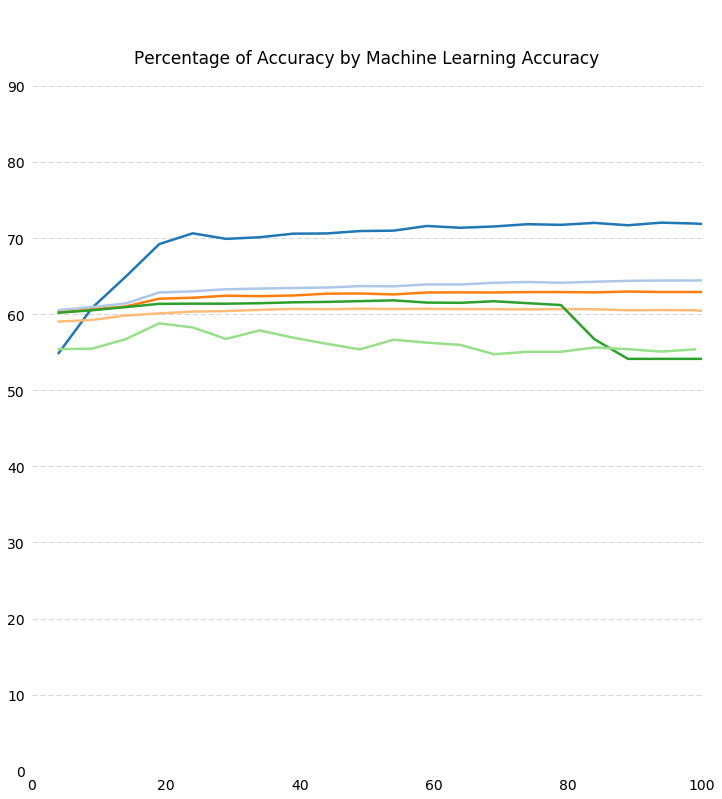

In [84]:
# df - Visualize Accuracy on small sample for each algorithm with added features

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
      
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 100)    
plt.xlim(0, 100)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 100, 10), [str(x) for x in range(0, 100, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 99, 10):    
    plt.plot(range(0, 200), [y] * len(range(0, 200)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

rf_percentage = []
gtb_percentage = []
ab_percentage = []
bnb_percentage = []
lr_percentage = []
knn_percentage = []

rf_percentage = [i * 100 for i in rf_accuracy]
gtb_percentage = [i * 100 for i in gtb_accuracy]
ab_percentage = [i * 100 for i in ab_accuracy]
bnb_percentage = [i * 100 for i in bnb_accuracy]
log_percentage = [i * 100 for i in log_accuracy]
knn_percentage = [i * 100 for i in knn_accuracy]
    
algorithms = ['Random Forests', 'Gradient Tree Boosting', 'Adaptive Boosting', 'Bernoulli Naive Bayes',
              'Logisitic Regression']    
  
plt.plot(range(4, 200, 5), rf_percentage, lw=2.5, color=tableau20[0])
plt.plot(range(4, 200, 5), gtb_percentage, lw=2.5, color=tableau20[1])
plt.plot(range(4, 200, 5), ab_percentage, lw=2.5, color=tableau20[2])
plt.plot(range(4, 200, 5), bnb_percentage, lw=2.5, color=tableau20[3])
plt.plot(range(4, 200, 5), log_percentage, lw=2.5, color=tableau20[4])
plt.plot(range(4, 100, 5), knn_percentage, lw=2.5, color=tableau20[5])

plt.text(50, 93, "Percentage of Accuracy by Machine Learning Accuracy", fontsize=17, ha="center")

plt.savefig("algorithm_accuracy.png", bbox_inches="tight") 

In [82]:
# df - Test Accuracy With Adding Features in Ranked Order on full dataset for top performing algorithms

all_rf_accuracy = []
all_rf_log_loss = []
all_ab_accuracy = []
all_ab_log_loss = []
all_gtb_accuracy = []
all_gtb_log_loss = []

# Train - Split - Reduce Dataset Size

for n in range(9, 150, 10):
    
    select_features = features[:(n+1)]
    
    print(n+1, "Features")
    
    # Random Forests
    model = RandomForestClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_rf_accuracy.append(accuracy)
    all_rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_ab_accuracy.append(accuracy)
    all_ab_log_loss.append(ll)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_gtb_accuracy.append(accuracy)
    all_gtb_log_loss.append(ll)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

10 Features
Random Forests accuracy: 0.65610490406
Random Forests log loss: 1.72574274047 

Adaptive Boosting accuracy: 0.608911762118
Adaptive Boosting log loss: 0.691682001619 

Gradient Tree Boosting accuracy: 0.612276766077
Gradient Tree Boosting log loss: 0.655317895799 

20 Features
Random Forests accuracy: 0.807461658016
Random Forests log loss: 0.576210184701 

Adaptive Boosting accuracy: 0.623019364046
Adaptive Boosting log loss: 0.691165540175 

Gradient Tree Boosting accuracy: 0.631125186945
Gradient Tree Boosting log loss: 0.640668112364 

30 Features
Random Forests accuracy: 0.826534901225
Random Forests log loss: 0.535477863718 

Adaptive Boosting accuracy: 0.624747074866
Adaptive Boosting log loss: 0.691096259647 

Gradient Tree Boosting accuracy: 0.635536103536
Gradient Tree Boosting log loss: 0.637747288314 

40 Features
Random Forests accuracy: 0.835689080477
Random Forests log loss: 0.521942983921 

Adaptive Boosting accuracy: 0.625502184687
Adaptive Boosting log los

KeyboardInterrupt: 

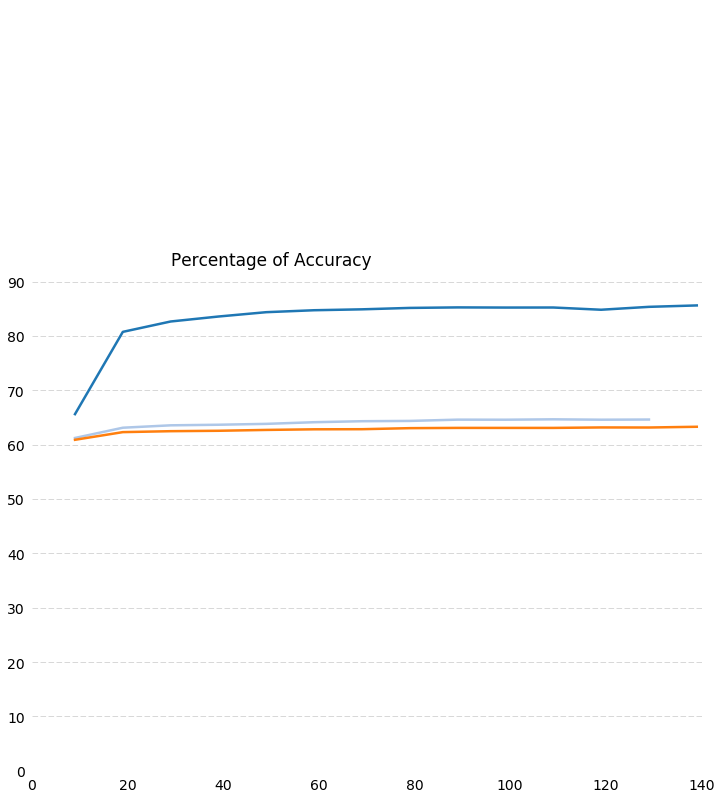

In [89]:
# df - Visualize Accuracy on Full Dataset for best algorithms

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
      
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 140)    
plt.xlim(0, 140)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 100, 10), [str(x) for x in range(0, 100, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 99, 10):    
    plt.plot(range(0, 200), [y] * len(range(0, 200)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

all_rf_percentage = []
all_gtb_percentage = []
all_ab_percentage = []

all_rf_percentage = [i * 100 for i in all_rf_accuracy]
all_gtb_percentage = [i * 100 for i in all_gtb_accuracy]
all_ab_percentage = [i * 100 for i in all_ab_accuracy]
    
algorithms = ['Random Forests', 'Gradient Tree Boosting', 'Adaptive Boosting']    
  
plt.plot(range(9, 140, 10), all_rf_percentage, lw=2.5, color=tableau20[0])
plt.plot(range(9, 130, 10), all_gtb_percentage, lw=2.5, color=tableau20[1])
plt.plot(range(9, 140, 10), all_ab_percentage, lw=2.5, color=tableau20[2])

plt.text(50, 93, "Percentage of Accuracy", fontsize=17, ha="center")

plt.savefig("algorithm_accuracy2.png", bbox_inches="tight") 

In [18]:
# df - Subset # 2 - Manually Selected Features Based on Correlation and Uniqueness

features_two = [
                'spcsrc_zscore',
                'tvol_zscore',
                'ivol_zscore',
                'dvrate_zscore',
                'DIVYIELD_zscore',
                'b_smb',
                'n',
                'ptb',
                'ps_zscore',
                'ocf_lct_zscore',
                'b_hml',
                'curr_debt_zscore',
                'b_mkt',
                'STDEV_sector_zscore',
                'profit_lct_sector_zscore',
                'R2_sector_zscore',
                'pe_op_basic_zscore',
                'BUYPCT',
                'pe_exi_zscore',
                'MEDREC',
                'pe_inc_zscore',
                'PEG_1yrforward_zscore',
                'HOLDPCT',
                'dvpsxm_zscore',
                'b_umd',
                'cash_debt_zscore',
                'MEANREC',
                'dvpspm_zscore',
                'PEG_trailing_zscore',
                'short_debt_sector_zscore',
                'PEG_ltgforward_zscore',
                'pcf_zscore'
                ]

In [12]:
# # df - Subset # 2 - Manually Selected Features Based on Correlation and Uniqueness

# pca_components = []
# lr_accuracy = []
# lr_mae = []
# rr_accuracy = []
# rr_mae = []
# log_accuracy = []
# log_log_loss = []
# bnb_accuracy = []
# bnb_log_loss = []
# mbnb_accuracy = []
# mbnb_log_loss = []
# gnb_accuracy = []
# gnb_log_loss = []
# rf_accuracy = []
# rf_log_loss = []
# knn_accuracy = []
# knn_log_loss = []
# ab_accuracy = []G
# ab_log_loss = []
# gtb_accuracy = []
# gtb_log_loss = []

# for n in range(1,101):

#     pca = PCA(n_components = n)
#     train_pca = pca.fit_transform(train[features])
#     test_pca = pca.transform(test[features])
#     pca_components.append(n)
#     print("PCA Components:", n, "\n")
    
#     # Linear Regression 
#     model = LinearRegression()
#     model.fit(train_pca, train['forward_twelve_month_return'])
#     predicted = np.array(model.predict(test_pca))
#     accuracy = model.score(test_pca, test['forward_twelve_month_return'])
#     mae = mean_absolute_error(test['forward_twelve_month_return'], predicted)
#     lr_accuracy.append(accuracy)
#     lr_mae.append(accuracy)
#     print("Linear Regression accuracy:", accuracy)
#     print("Linear Regression mean absolute error:", mae, "\n")
    
#     # Ridge Regression 
#     model = LinearRegression()
#     model.fit(train_pca, train['forward_twelve_month_return'])
#     predicted = np.array(model.predict(test_pca))
#     accuracy = model.score(test_pca, test['forward_twelve_month_return'])
#     mae = mean_absolute_error(test['forward_twelve_month_return'], predicted)
#     rr_accuracy.append(accuracy)
#     rr_mae.append(accuracy)
#     print("Ridge Regression accuracy:", accuracy)
#     print("Ridge Regression mean absolute error:", mae, "\n")
    
#     # Logistic Regression
#     model = LogisticRegression()
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     log_accuracy.append(accuracy)
#     log_log_loss.append(accuracy)
#     print("Logistic Regression accuracy:", accuracy)
#     print("Logistic Regression log loss:", ll, "\n")
    
#     # Bernoulli Naive Bayes
#     model = BernoulliNB()
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     bnb_accuracy.append(accuracy)
#     bnb_log_loss.append(accuracy)
#     print("Bernoulli Naive Bayes accuracy:", accuracy)
#     print("Bernoulli Naive Bayes log loss:", ll, "\n")

#     # Random Forests
#     model = RandomForestClassifier()
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     rf_accuracy.append(accuracy)
#     rf_log_loss.append(accuracy)
#     print("Random Forests accuracy:", accuracy)
#     print("Random Forests log loss:", ll, "\n")
    
#     # K-Nearest Neighbors
#     model = KNeighborsClassifier()
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     knn_accuracy.append(accuracy)
#     knn_log_loss.append(accuracy)
#     print("K-Nearest Neighbors accuracy:", accuracy)
#     print("K-Nearest Neighbors log loss:", ll, "\n")
    
#     # Adaptive Boosting
#     model = AdaBoostClassifier()
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     ab_accuracy.append(accuracy)
#     ab_log_loss.append(accuracy)
#     print("Adaptive Boosting accuracy:", accuracy)
#     print("Adaptive Boosting log loss:", ll, "\n")
    
#     # Gradient Tree Boosting
#     model = GradientBoostingClassifier(n_estimators=100)
#     model.fit(train_pca, train['labels'])
#     predicted = np.array(model.predict_proba(test_pca))
#     accuracy = model.score(test_pca, test['labels'])
#     ll = log_loss(test['labels'], predicted)
#     gtb_accuracy.append(accuracy)
#     gtb_log_loss.append(accuracy)
#     print("Gradient Tree Boosting accuracy:", accuracy)
#     print("Gradient Tree Boosting log loss:", ll, "\n")

PCA Components: 1 

Linear Regression accuracy: -6.63019723044e-05
Linear Regression mean absolute error: 64.8644242571 

Ridge Regression accuracy: -6.63019723044e-05
Ridge Regression mean absolute error: 64.8644242571 

Logistic Regression accuracy: 0.452692003167
Logistic Regression log loss: 0.693145896497 

Bernoulli Naive Bayes accuracy: 0.547310440554
Bernoulli Naive Bayes log loss: 0.688664137392 

Random Forests accuracy: 0.547337321486
Random Forests log loss: 0.688640042849 

K-Nearest Neighbors accuracy: 0.4757631741
K-Nearest Neighbors log loss: 2.58581527977 

Adaptive Boosting accuracy: 0.547337321486
Adaptive Boosting log loss: 0.6929690551 

Gradient Tree Boosting accuracy: 0.547337321486
Gradient Tree Boosting log loss: 0.688644130757 

PCA Components: 2 

Linear Regression accuracy: -6.63018764246e-05
Linear Regression mean absolute error: 64.864426854 

Ridge Regression accuracy: -6.63018764246e-05
Ridge Regression mean absolute error: 64.864426854 

Logistic Regres

KeyboardInterrupt: 

In [9]:
# df - Subset - Features vs Dependent (Magnitude)
# X_magnitude, y_magnitude = df[features], df[dependent]

In [10]:
# df - Subset - Features vs Dependent (Categorical)
# X_categorical, y_categorical = df[features], df[dependent]

In [26]:
# df - Subset - Top 80 Features

my_features = features[:80]

In [ ]:
# # df - Analysis - Best Number of Features for Linear Regression
# feature_count = []
# r2_score = []
# r2_score_predicted = []
# feature_list_end = []

# columns = train[features].columns

# for n in range(400):
#     clf = Ridge()
#     k = (n+1)
#     best = SelectKBest(score_func=f_regression, k=k)
#     best.fit(train[features], train['forward_twelve_month_return'])
#     X_train = best.transform(train[features])
#     X_test = best.transform(test[features])

#     # Fit Model
#     clf.fit(X_train, train['forward_twelve_month_return'])
#     score_train = clf.score(X_train, train['forward_twelve_month_return'])
#     score = clf.score(X_test, test['forward_twelve_month_return'])
    
#     # List of Features
#     feature_list = [columns[x] for x in best.get_support(indices=True) if x]
#     new_feature = set(feature_list) - set(feature_list_end)
#     feature_list_end = feature_list
    
#     # Output
#     print("R2:", score," (predicted:", score_train,") - new feature added," , new_feature, "making", k, "selected features:", feature_list_end, "\n")
    
#     feature_count.append(k)
#     r2_score.append(score)
#     r2_score_predicted(score_train)

In [ ]:
# # Total Amount of Variance Explained By Pricipal Components

# x = []
# y = []

# # Iterate through the first k principal components, for k in [1, 10]
# for k in range(1, 10):

#     # Fit Principal Components Analysis
#     pca = PCA(n_components = k)
#     pca.fit(train[features])

#     # Record the cumulative sum
#     cumulative = sum(pca.explained_variance_ratio_)

#     # Append k principal components to x list
#     x.append(k)
#     # Append cumulative sum to y list
#     y.append(cumulative)

#     print('%10s  %15.4f'%(k, cumulative))

# # Data Visualization
# fig = plt.figure(figsize=(12, 9))

# # Remove chart junk
# ax = plt.subplot(111)
# ax.spines["top"].set_visible(False)    
# ax.spines["bottom"].set_visible(False)    
# ax.spines["right"].set_visible(False)    
# ax.spines["left"].set_visible(False)    
# ax.get_xaxis().tick_bottom()    
# ax.get_yaxis().tick_left()

# # Set graph limits and remove the '0' from x axis to reduce redundancy
# plt.ylim(-0.01, 1)    
# plt.xlim(0, 51)

# # Create horizontal lines as a visual guide of reference
# for i in range(-10, 100, 10):    
#     plt.plot(range(0, 51), [i/100] * len(range(0, 51)), "--", lw=0.5, color="black", alpha=0.3)    

# # Remove chart junk
# plt.tick_params(axis="both", which="both", bottom="off", top="off",    
#                 labelbottom="on", left="off", right="off", labelleft="on") 


# plt.plot(x, y, linewidth=2, linestyle='--', alpha=0.8, c="#a2d4ec", marker='o', markersize=6, 
#          markerfacecolor='#1696d2', mec = '#55b748')
# plt.xlabel('K Components', fontsize=12)
# plt.xticks(fontsize = 11)
# plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize = 11)
# plt.show()

In [28]:
# Random Forests
model = RandomForestClassifier()
model.fit(train[my_features], train['labels'])
predicted = np.array(model.predict_proba(test[my_features]))
accuracy = model.score(test[my_features], test['labels'])
ll = log_loss(test['labels'], predicted)
print("Random Forests:", accuracy)
print("Random Forests:", ll, "\n")

Random Forests: 0.853472038943
Random Forests: 0.528279155635 



In [31]:
# Logistic Regression
model = LogisticRegression()
model.fit(train[my_features], train['labels'])
predicted = np.array(model.predict_proba(test[my_features]))
accuracy = model.score(test[my_features], test['labels'])
ll = log_loss(test['labels'], predicted)
print("Logistic Regression accuracy:", accuracy)
print("Logistic Regression log loss:", ll, "\n")

Logistic Regression accuracy: 0.583890501745
Logistic Regression log loss: 0.672198574171 



In [34]:
# df - Subset - Features Available in real-time scrape

realtime_features = [
                    'pe_op_basic',
                    'PEG_trailing',
                    'ps',
                    'ptb',
                    'pcf',
                    'DIVYIELD',
                    'roa',
                    'MEANREC',
                    'curr_ratio',
                    'quick_ratio',
                    'sector_Financials',
                    'sector_Information Technology',
                    'sector_Consumer Discretionary',
                    'sector_Industrials',
                    'sector_Health Care',
                    'sector_Energy',
                    'sector_Materials',
                    'sector_Consumer Staples',
                    'sector_Utilities',
                    'sector_Telecommunication Services',
                    'sector_Real Estate',
                    'past_twelve_month_return_up',
                    'past_six_month_return_up',
                    'past_three_month_return_up',
                    'past_one_month_return_up',
                    'january',
                    'february',
                    'march',
                    'april',
                    'may',
                    'june',
                    'july',
                    'august',
                    'september',
                    'october',
                    'november',
                    'december',
                    'pe_op_basic_zscore',
                    'PEG_trailing_zscore',
                    'ps_zscore',
                    'ptb_zscore',
                    'pcf_zscore',
                    'DIVYIELD_zscore',
                    'roa_zscore',
                    'MEANREC_zscore',
                    'curr_ratio_zscore',
                    'pe_op_basic_sector_zscore',
                    'PEG_trailing_sector_zscore',
                    'ps_sector_zscore',
                    'ptb_sector_zscore',
                    'pcf_sector_zscore',
                    'DIVYIELD_sector_zscore',
                    'roa_sector_zscore',
                    'MEANREC_sector_zscore',
                    'curr_ratio_sector_zscore',
                    'quick_ratio_sector_zscore'
                    ]

In [35]:
# Real-time features - Investigation - Correlation

feature = []
correlation = []
correlation_direction = []
significance = []

for column in df[realtime_features]:
    try:
        pair = pearsonr(df['labels'], df[column])
        feature.append(column)
        correlation.append(abs(pair[0]))
        correlation_direction.append(pair[0])
        significance.append(pair[1])
    except:
        feature.append(column)
        correlation.append(np.np.nan)
        correlation_direction.append(np.np.nan)
        significance.append(np.np.nan)
    
review = pd.DataFrame()
review['feature'] = feature
review['correlation'] = correlation
review['correlation_direction'] = correlation_direction
review['significance'] = significance

# review - Sort - Correlation
review = review.sort_values(by=['correlation'], ascending=0)
review

,feature,correlation,correlation_direction,significance
21,past_twelve_month_return_up,0.144902,0.144902,0.000000e+00
22,past_six_month_return_up,0.121195,0.121195,0.000000e+00
5,DIVYIELD,0.111531,0.111531,0.000000e+00
42,DIVYIELD_zscore,0.107266,0.107266,0.000000e+00
10,sector_Financials,0.103488,0.103488,0.000000e+00
23,past_three_month_return_up,0.088334,0.088334,0.000000e+00
3,ptb,0.073782,-0.073782,0.000000e+00
39,ps_zscore,0.073119,-0.073119,0.000000e+00
2,ps,0.070924,-0.070924,0.000000e+00
40,ptb_zscore,0.060025,-0.060025,0.000000e+00


In [36]:
# Real-time features - Investigation - Write Correlation to CSV

review.to_csv('realtime_correlation.csv')

In [39]:
# Real-time features - Analysis - Measure, Rank, and Store Feature Importance

model = ExtraTreesClassifier()
model.fit(df[realtime_features], df['forward_twelve_month_return_up'])
feature_weight = list(model.feature_importances_)

length = len(realtime_features)

feature_name = []
weight = []

for n in range(length):
    feature_name.append(realtime_features[n])
    weight.append(feature_weight[n])
    
feature_rank = pd.DataFrame()
feature_rank['feature'] = feature_name
feature_rank['weight'] = weight

# Sort from largest weight to smallest
return_all_rows(feature_rank.sort_values('weight', ascending=0))

,feature,weight
3,ptb,0.035849
2,ps,0.033966
41,pcf_zscore,0.033493
4,pcf,0.033179
43,roa_zscore,0.033076
39,ps_zscore,0.033015
6,roa,0.032688
48,ps_sector_zscore,0.032471
52,roa_sector_zscore,0.032412
40,ptb_zscore,0.032387


In [40]:
# Real-time feature rank - Investigation - Write Correlation to CSV

feature_rank.to_csv('realtime_feature_rank.csv')

In [41]:
# Real-time features - Subset - Restructure Feature Ranks Based on Correlation and Feature Weight Rank

realtime_features = [
                    'DIVYIELD',
                    'ptb',
                    'ps',
                    'pe_op_basic',
                    'sector_Financials',
                    'past_twelve_month_return_up',
                    'sector_Information Technology',
                    'past_six_month_return_up',
                    'PEG_trailing',
                    'MEANREC',
                    'sector_Consumer Discretionary',
                    'past_three_month_return_up',
                    'pcf',
                    'sector_Utilities',
                    'sector_Health Care',
                    'past_one_month_return_up',
                    'roa',
                    'DIVYIELD_zscore',
                    'curr_ratio',
                    'sector_Consumer Staples',
                    'ps_zscore',
                    'ptb_zscore',
                    'sector_Telecommunication Services',
                    'sector_Real Estate',
                    'quick_ratio',
                    'sector_Materials',
                    'pe_op_basic_zscore',
                    'sector_Energy',
                    'sector_Industrials',
                    'PEG_trailing_zscore',
                    'ps_sector_zscore',
                    'january',
                    'pcf_zscore',
                    'pe_op_basic_sector_zscore',
                    'ptb_sector_zscore',
                    'DIVYIELD_sector_zscore',
                    'february',
                    'october',
                    'MEANREC_zscore',
                    'PEG_trailing_sector_zscore',
                    'pcf_sector_zscore',
                    'july',
                    'roa_zscore',
                    'april',
                    'june',
                    'august',
                    'december',
                    'march',
                    'may',
                    'september',
                    'MEANREC_sector_zscore',
                    'roa_sector_zscore',
                    'november',
                    'curr_ratio_zscore',
                    'curr_ratio_sector_zscore',
                    'quick_ratio_sector_zscore'
                    ]

In [ ]:
# Real-time features - Test Accuracy With Adding Features in Ranked Order on full dataset for top performing algorithms

all_rf_accuracy = []
all_rf_log_loss = []
all_ab_accuracy = []
all_ab_log_loss = []
all_gtb_accuracy = []
all_gtb_log_loss = []

# Train - Split - Reduce Dataset Size

for n in range(4, 55, 5):
    
    select_features = realtime_features[:(n+1)]
    
    print(n+1, "Features")
    
    # Random Forests
    model = RandomForestClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_rf_accuracy.append(accuracy)
    all_rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_ab_accuracy.append(accuracy)
    all_ab_log_loss.append(ll)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_gtb_accuracy.append(accuracy)
    all_gtb_log_loss.append(ll)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

5 Features
Random Forests accuracy: 0.617748257627
Random Forests log loss: 1.00854926187 

Adaptive Boosting accuracy: 0.600449155939
Adaptive Boosting log loss: 0.691893093264 

Gradient Tree Boosting accuracy: 0.603056606356
Gradient Tree Boosting log loss: 0.658830187108 

10 Features
Random Forests accuracy: 0.72383507815
Random Forests log loss: 0.72059387083 

Adaptive Boosting accuracy: 0.614002033176
Adaptive Boosting log loss: 0.691347385106 

Gradient Tree Boosting accuracy: 0.619742334047
Gradient Tree Boosting log loss: 0.645738414829 

15 Features
Random Forests accuracy: 0.729602259953
Random Forests log loss: 0.684915231151 

Adaptive Boosting accuracy: 0.620353264323
Adaptive Boosting log loss: 0.691203789203 



In [ ]:
# df - Visualize Accuracy on Full Dataset for best algorithms

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
      
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 140)    
plt.xlim(0, 140)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 100, 10), [str(x) for x in range(0, 100, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 99, 10):    
    plt.plot(range(0, 200), [y] * len(range(0, 200)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

all_rf_percentage = []
all_gtb_percentage = []
all_ab_percentage = []

all_rf_percentage = [i * 100 for i in all_rf_accuracy]
all_gtb_percentage = [i * 100 for i in all_gtb_accuracy]
all_ab_percentage = [i * 100 for i in all_ab_accuracy]
    
algorithms = ['Random Forests', 'Gradient Tree Boosting', 'Adaptive Boosting']    
  
plt.plot(range(9, 140, 10), all_rf_percentage, lw=2.5, color=tableau20[0])
plt.plot(range(9, 130, 10), all_gtb_percentage, lw=2.5, color=tableau20[1])
plt.plot(range(9, 140, 10), all_ab_percentage, lw=2.5, color=tableau20[2])

plt.text(50, 93, "Percentage of Accuracy", fontsize=17, ha="center")

plt.savefig("algorithm_accuracy2.png", bbox_inches="tight") 